In [ ]:
pip install autoviz

In [ ]:
pip install pyforest

In [191]:
import pyforest

In [168]:
df=pd.read_csv("/content/IPL Ball-by-Ball 2008-2020.csv")
df.head()

<IPython.core.display.Javascript object>

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [169]:
for col in df.columns:
  print(col)

id
inning
over
ball
batsman
non_striker
bowler
batsman_runs
extra_runs
total_runs
non_boundary
is_wicket
dismissal_kind
player_dismissed
fielder
extras_type
batting_team
bowling_team


In [170]:
df.shape

(193468, 18)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [172]:
#Replacing the Full names by short names
df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Delhi Capitals',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','DCA','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [ ]:
#Dropping useless columns
df.drop(['id','non_striker','dismissal_kind','player_dismissed','fielder','extras_type'], axis=1, inplace=True)
# set id as the index column
df.set_index('id', inplace=True)

In [206]:
df

,inning,over,ball,batsman,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team
0,1,6,5,RT Ponting,AA Noffke,1,0,1,0,0,KKR,RCB
1,1,6,6,BB McCullum,AA Noffke,1,0,1,0,0,KKR,RCB
2,1,7,1,BB McCullum,Z Khan,0,0,0,0,0,KKR,RCB
3,1,7,2,BB McCullum,Z Khan,1,0,1,0,0,KKR,RCB
4,1,7,3,RT Ponting,Z Khan,1,0,1,0,0,KKR,RCB
...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1,12,5,RR Pant,NM Coulter-Nile,0,0,0,0,0,DCA,MI
193464,1,12,6,RR Pant,NM Coulter-Nile,1,0,1,0,0,DCA,MI
193465,1,13,1,RR Pant,KH Pandya,0,1,1,0,0,DCA,MI
193466,1,13,2,RR Pant,KH Pandya,1,0,1,0,0,DCA,MI


. For MI which bowler gave the most extra runs (top 5 only) (take only bowlers who bowled atleast 24 deliveries). Find the % of extra over total balls bowled

In [174]:
#null values
df.isnull().sum()

inning            0
over              0
ball              0
batsman           0
bowler            0
batsman_runs      0
extra_runs        0
total_runs        0
non_boundary      0
is_wicket         0
batting_team      0
bowling_team    191
dtype: int64

In [204]:
#non_boundary feature
df['non_boundary'].value_counts()

0    193452
1        16
Name: non_boundary, dtype: int64

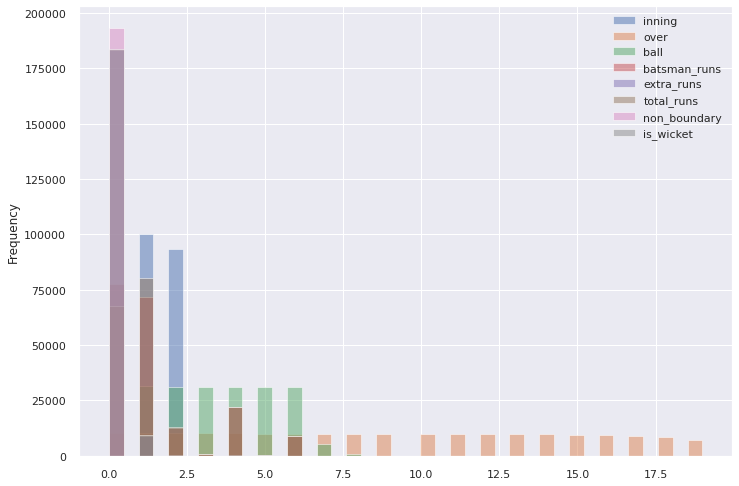

In [175]:
#histplot of different features
df.plot.hist(bins=40, alpha=0.5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

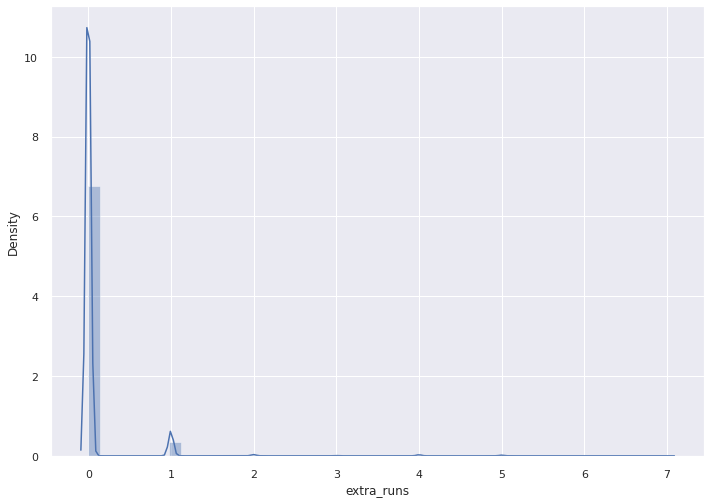

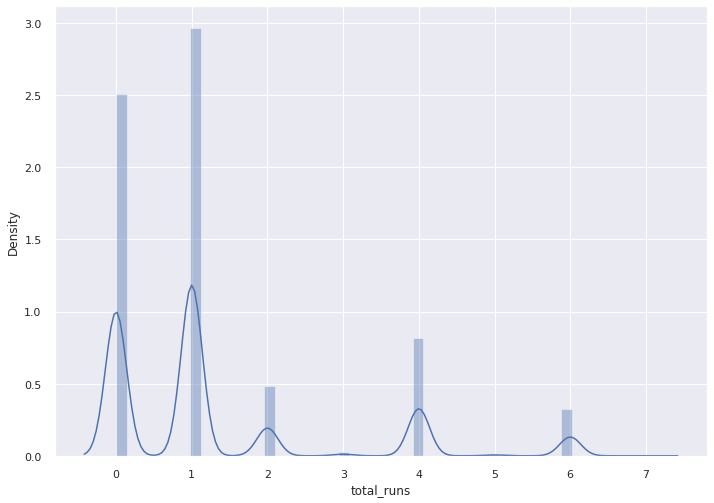

In [203]:
#distplot of extra_runs and total_runs
continous=['extra_runs','total_runs']
for column in continous:
    plt.figure()
    sns.distplot(df[column])

In [205]:
#inning feature

df['inning'].value_counts()

1    100191
2     93277
Name: inning, dtype: int64

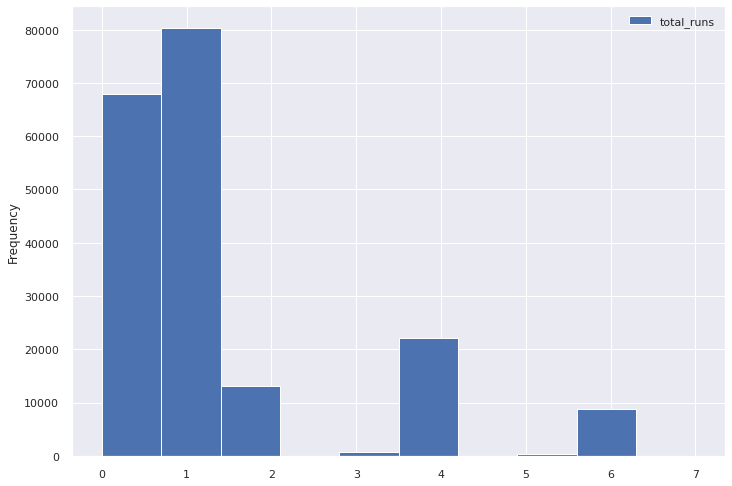

In [207]:
#hist plot of total_run by ball 
df.plot( x='ball', y='total_runs', kind='hist')

take only bowlers who bowled atleast 1000 deliveries. (only top 5)

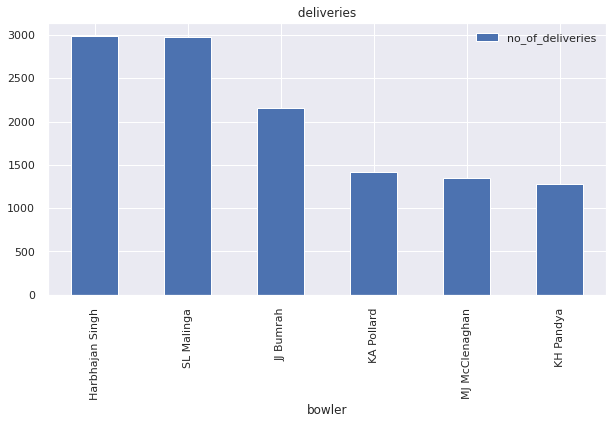

In [212]:
no_of_deliveries_per_bowler =df[df["bowling_team"] == "MI"].groupby("bowler")["bowler"].count().to_frame()
no_of_deliveries_per_bowler.rename(columns={'bowler': 'no_of_deliveries'}, inplace=True)
no_of_deliveries_per_bowler_atleast1000 = no_of_deliveries_per_bowler[no_of_deliveries_per_bowler['no_of_deliveries'] > 1000]
perc = no_of_deliveries_per_bowler_atleast1000
perc.sort_values(by='no_of_deliveries', ascending=False).head(8).plot(kind='bar', figsize=(10, 5), title=' deliveries ')

<IPython.core.display.Javascript object>

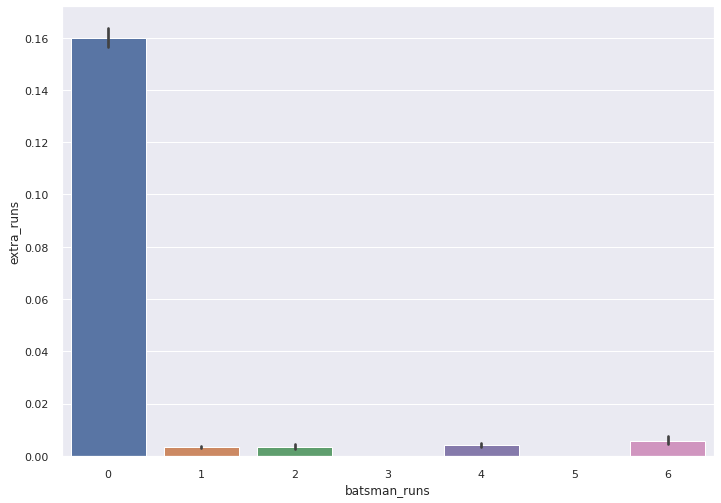

In [213]:
#extra_runs feature
sns.barplot(x='batsman_runs',y='extra_runs',data=df)

<IPython.core.display.Javascript object>

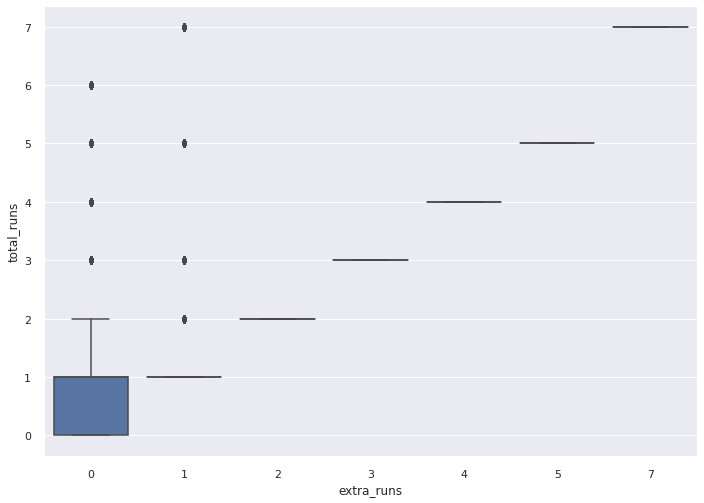

In [179]:
sns.boxplot( x='extra_runs', y = 'total_runs', 
               data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

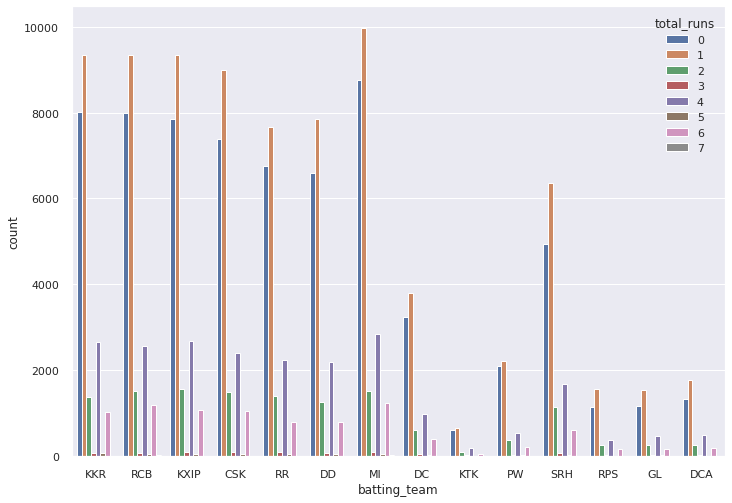

In [180]:
#countplot for batting team with respect to total_runs
 sns.set_theme(style="darkgrid")
 sns.set(rc={'figure.figsize':(11.7,8.27)})
 sns.countplot(x="batting_team",hue='total_runs',data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

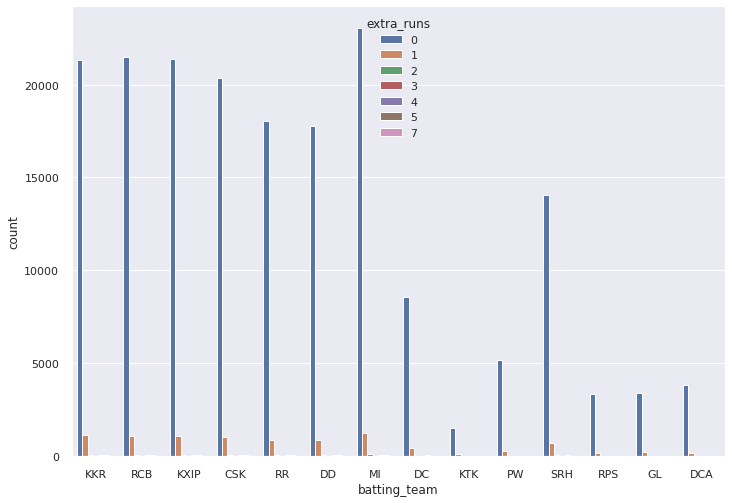

In [181]:
 #countplot for batting tem with respect to extra runs
 sns.set_theme(style="darkgrid")
 sns.set(rc={'figure.figsize':(11.7,8.27)})
 sns.countplot(x="batting_team",hue='extra_runs',data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

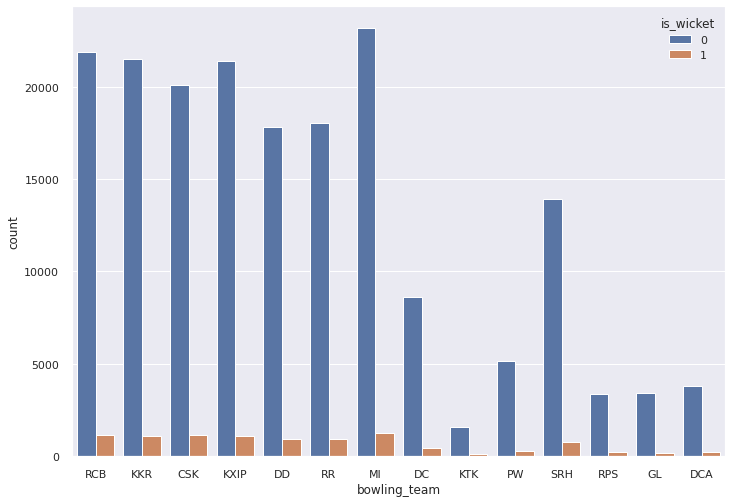

In [215]:
 #countplot for bolwing team with respect to is_wicket columns
 sns.set_theme(style="darkgrid")
 sns.set(rc={'figure.figsize':(11.7,8.27)})
 sns.countplot(x="bowling_team",hue='is_wicket',data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

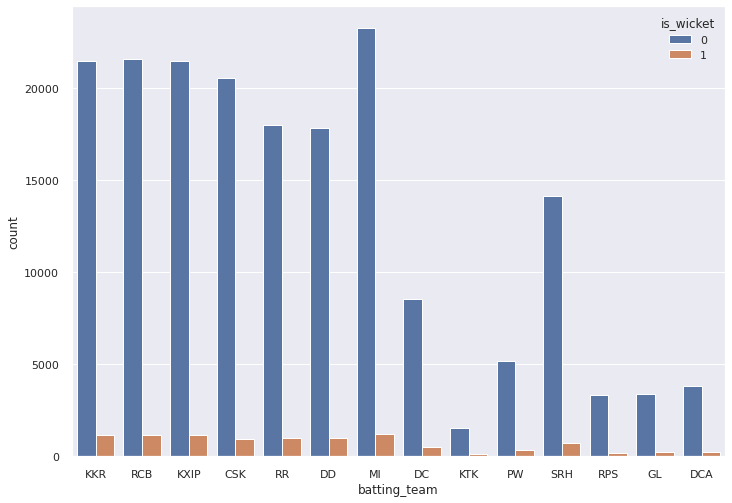

In [200]:
 countplot for batting team with respect to is_wicket columns
 sns.set_theme(style="darkgrid")
 sns.set(rc={'figure.figsize':(11.7,8.27)})
 sns.countplot(x="batting_team",hue='is_wicket',data=df)

This EDA will help in further processing.